In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
sys.path.append('../')
import retrieval_functions as rf

import importlib
importlib.reload(rf)
rf.init_plotting()


In [2]:
experiment="13_LeNet4Nodes"
data=[]
for framework in ["HPMPC","MPyC","MP-SPDZ"]:
    path= "..\..\..\Ergebnisse\Deviation\\"+framework+"\\"+experiment+"\data\short_results.csv"
    frame=pd.read_csv(path ,header=0,sep=';',index_col=False,engine='python')
    frame['framework']=framework
    if framework=="MPyC":
        # assuming your dataframe is df and the time column is 'time'
        frame['runtime_internal(s)'] = pd.to_datetime(frame['runtime_internal(s)'], format='%H:%M:%S.%f').dt.time

        # convert time to seconds
        frame['runtime_internal(s)'] = frame['runtime_internal(s)'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second + t.microsecond*1e-6)
        frame['peakRAM(MiB)']= frame['peakRAM(MiB)']
    elif framework=="HPMPC":
        factor = 1
        if frame['splitroles'].max() == 1:
            factor = 6	
        elif frame['splitroles'].max() == 2:
            factor = 24
        else:
            factor=1
        frame['runtime_external(s)'] = pd.to_numeric(frame['runtime_external(s)'])* frame['threads'].max()*factor
    data.append(frame)

In [25]:
experiment="06_LeNet"
data2=[]
for framework in ["HPMPC","MPyC","MP-SPDZ"]:
    path= "..\..\..\Ergebnisse\Deviation\\"+framework+"\\"+experiment+"\data\short_results.csv"
    frame=pd.read_csv(path ,header=0,sep=';',index_col=False,engine='python')
    frame['framework']=framework
    if framework=="MPyC":
        # assuming your dataframe is df and the time column is 'time'
        frame['runtime_internal(s)'] = pd.to_datetime(frame['runtime_internal(s)'], format='%H:%M:%S.%f').dt.time

        # convert time to seconds
        frame['runtime_internal(s)'] = frame['runtime_internal(s)'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second + t.microsecond*1e-6)
        frame['peakRAM(MiB)']= frame['peakRAM(MiB)']
    elif framework=="HPMPC":
        factor = 1
        if frame['splitroles'].max() == 1:
            factor = 6	
        elif frame['splitroles'].max() == 2:
            factor = 24
        else:
            factor=1
        frame['runtime_external(s)'] = pd.to_numeric(frame['runtime_external(s)'])* frame['threads'].max()*factor
    data2.append(frame)

In [3]:
bandwidth,label=rf.get_bandwidth_deviation(data)
latency,label=rf.get_latency_deviation(data)
packetdrop,label=rf.get_packetdrop_deviation(data)

In [4]:
experiment="04_Neural Network Inference LeNet 4 Nodes"

In [5]:
bandwidth

[                  mean       std  bandwidths(Mbs)
 bandwidths(Mbs)                                  
 100              1.160  0.110725              100
 1000             0.537  0.009487             1000
 10000            0.436  0.096977            10000
 25000            0.466  0.017927            25000,
                      mean       std  bandwidths(Mbs)
 bandwidths(Mbs)                                     
 100              1.971818  0.023587              100
 1000             0.266000  0.005164             1000
 10000            0.084000  0.018379            10000
 25000            0.088667  0.016761            25000,
                      mean       std  bandwidths(Mbs)
 bandwidths(Mbs)                                     
 100              1.400909  0.018141              100
 1000             0.211000  0.005676             1000
 10000            0.092000  0.015492            10000
 25000            0.092667  0.011725            25000,
                     mean       std  bandwi

In [6]:
label[0]="HP-MPC act. adv./ hst. maj. RCA"
label[1]="HP-MPC act. adv./ hst. maj. PPA"
label[2]="HP-MPC act. adv./ hst. maj. PPA (4-way)"
label[3]="MPyC pas. adv./ hst. maj."
label[4]="MP-SPDZ act. adv./ hst. maj."

In [7]:
table_string = "\\begin{center}\n"
table_string += "\\begin{tabular}{|c|c|c|c|c|}\n"
table_string += "\\hline\n"
table_string += "    & "
for band in bandwidth[0].index:
    table_string += "    " + str(band) + " & "
table_string = table_string[:-2] + "\\\\\n"
table_string += "\\hline\n"
for s,band in enumerate(bandwidth):
    table_string += label[s] + " & "
    for i,value in enumerate(band.index):
        table_string += "    " + str(round(band['mean'].iloc[i],3)) + " "+ u"\u00B1" + " " + str(round(band['std'].iloc[i],3))  +  " & "
    table_string = table_string[:-2] + "\\\\\\hline\n"

table_string += "\\end{tabular}\n"
table_string += "\\end{center}"

print(table_string)


\begin{center}
\begin{tabular}{|c|c|c|c|c|}
\hline
    &     100 &     1000 &     10000 &     25000 \\
\hline
HP-MPC act. adv./ hst. maj. RCA &     1.16 ± 0.111 &     0.537 ± 0.009 &     0.436 ± 0.097 &     0.466 ± 0.018 \\\hline
HP-MPC act. adv./ hst. maj. PPA &     1.972 ± 0.024 &     0.266 ± 0.005 &     0.084 ± 0.018 &     0.089 ± 0.017 \\\hline
HP-MPC act. adv./ hst. maj. PPA (4-way) &     1.401 ± 0.018 &     0.211 ± 0.006 &     0.092 ± 0.015 &     0.093 ± 0.012 \\\hline
MPyC pas. adv./ hst. maj. &     249.028 ± 5.617 &     210.478 ± 8.917 &     208.4 ± 9.114 &     209.433 ± 8.681 \\\hline
MP-SPDZ act. adv./ hst. maj. &     16.432 ± 0.05 &     3.35 ± 0.047 &     1.927 ± 0.136 &     1.875 ± 0.125 \\\hline
\end{tabular}
\end{center}


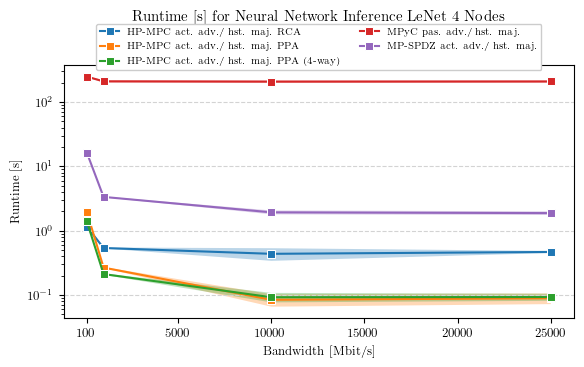

In [7]:
label[0]="HP-MPC act. adv./ hst. maj. RCA"
label[1]="HP-MPC act. adv./ hst. maj. PPA"
label[2]="HP-MPC act. adv./ hst. maj. PPA (4-way)"
label[3]="MPyC pas. adv./ hst. maj."
label[4]="MP-SPDZ act. adv./ hst. maj."
rf.plot_deviation_bandwidth(bandwidth,label,"Bandwidth_dev.png",experiment,"Bandwidth [Mbit/s]","Runtime [s]",True,x_ticks=[100,5000,10000,15000,20000,25000],right_push=0.5,up_push=1.18)

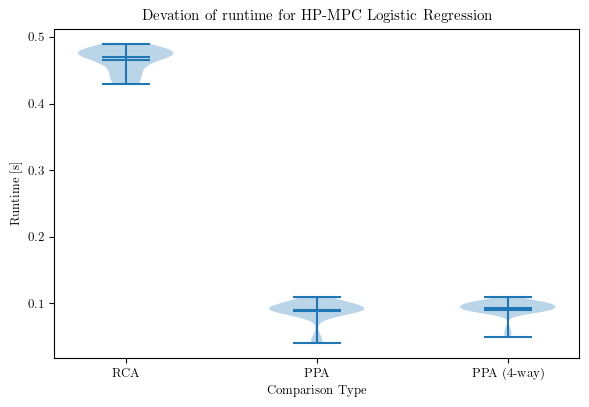

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Example data
fig, ax = plt.subplots()
deviation61 = data[0].loc[(data[0]['bandwidths(Mbs)'] == 25000) & (data[0]['function'] == 82) & (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) & (data[0]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
deviation62 = data[0].loc[(data[0]['bandwidths(Mbs)'] == 25000)  & (data[0]['function'] == 182) & (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) & (data[0]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
deviation63 = data[0].loc[(data[0]['bandwidths(Mbs)'] == 25000)  & (data[0]['function'] == 282)& (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) & (data[0]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()

# Plot the first violin plot
two_dimensional_list = [deviation61, deviation62, deviation63]
ax.violinplot(two_dimensional_list, showmeans=True, showmedians=True)
# Set the x-tick labels
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(["RCA", "PPA", "PPA (4-way)"])

# Set plot title and labels
plt.title("Devation of runtime for HP-MPC Logistic Regression")
plt.xlabel("Comparison Type")
plt.ylabel("Runtime [s]")
fig.tight_layout()
#ax.set_yscale('log')
ax.figure.set_size_inches(5.91, 4)
plt.savefig("HPMPC_deviation.png",dpi=300,bbox_inches='tight')
plt.show()


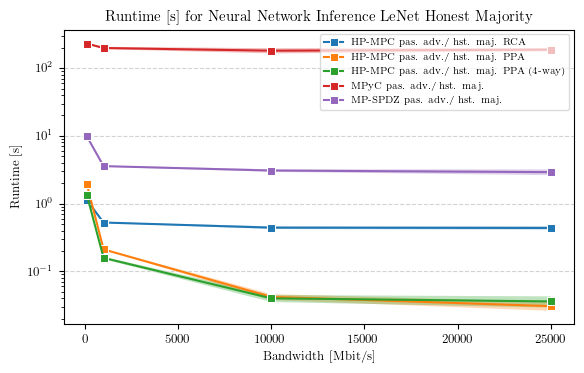

In [23]:
bandwidth_honest = [x for i, x in enumerate(bandwidth) if "dishst." not in label[i]]
label_honest = [x for x in label if "dishst." not in x]
rf.plot_deviation(bandwidth_honest,label_honest,"Bandwidth_dev_honest.png",experiment+" Honest Majority","Bandwidth [Mbit/s]","Runtime [s]",True)

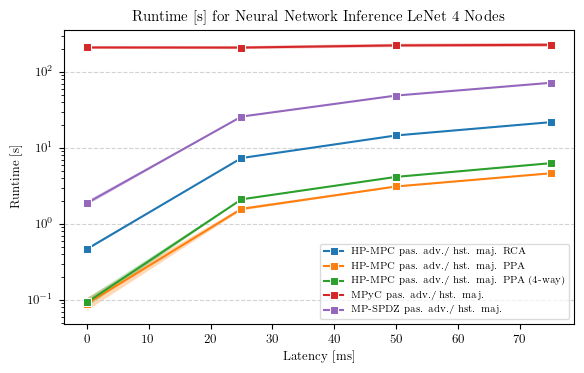

In [9]:
label[0]="HP-MPC pas. adv./ hst. maj. RCA"
label[1]="HP-MPC pas. adv./ hst. maj. PPA"
label[2]="HP-MPC pas. adv./ hst. maj. PPA (4-way)"
label[3]="MPyC pas. adv./ hst. maj."
label[4]="MP-SPDZ pas. adv./ hst. maj."
rf.plot_deviation(latency,label,"Latency_dev.png",experiment,"Latency [ms]","Runtime [s]",True)

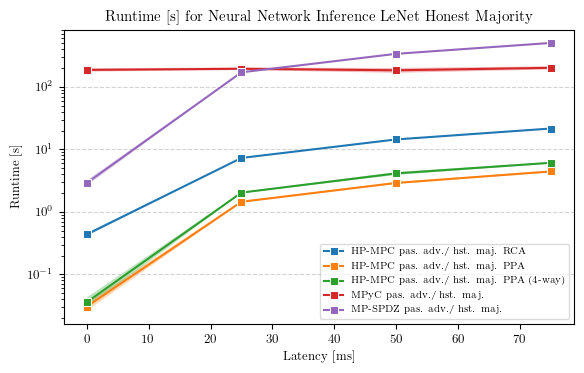

In [25]:
latency_honest = [x for i, x in enumerate(latency) if "dishst." not in label[i]]
label_honest = [x for x in label if "dishst." not in x]
rf.plot_deviation(latency_honest,label_honest,"Latency_dev_honest.png",experiment+" Honest Majority","Latency [ms]","Runtime [s]",True)

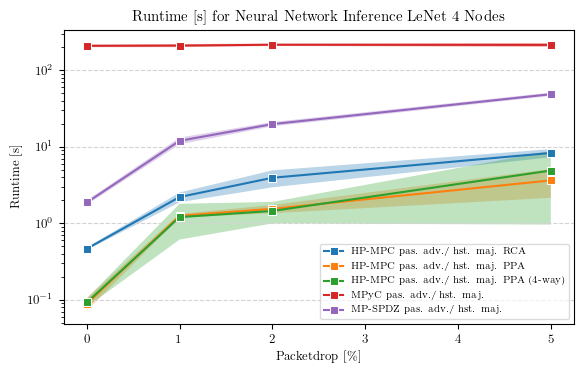

In [10]:
label[0]="HP-MPC pas. adv./ hst. maj. RCA"
label[1]="HP-MPC pas. adv./ hst. maj. PPA"
label[2]="HP-MPC pas. adv./ hst. maj. PPA (4-way)"
label[3]="MPyC pas. adv./ hst. maj."
label[4]="MP-SPDZ pas. adv./ hst. maj."
rf.plot_deviation(packetdrop,label,"Mult_Packetdrop_dev.png",experiment,"Packetdrop [\%]","Runtime [s]",True)

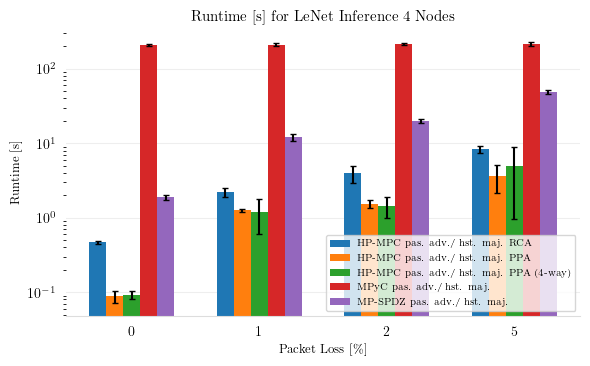

In [12]:
fig, ax = plt.subplots()
width = 0.4 # the width of the bars
ind = np.arange(4)*3  # Adjust the first parameter to center the bars

bar_list=[]
for i in range(len(packetdrop)):
    bar_list.append(ax.bar(ind - 0.8 + i * width, packetdrop[i]['mean'], width, yerr=packetdrop[i]['std'], label=label[i]))

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_yscale('log')
ax.set_ylabel('Runtime [s]')
ax.set_xlabel('Packet Loss [\%]')
ax.set_title('Runtime [s] for LeNet Inference 4 Nodes')
ax.set_xticks(ind)
ax.set_xticklabels((packetdrop[0]['packetdrops(%)']))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False,labelsize=10)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.set_yscale('log')
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
fig.tight_layout()
ax.legend(loc='lower right')
ax.figure.set_size_inches(5.91, 3.5)
plt.savefig(experiment+'_packetdrop_bar.png',dpi=300, bbox_inches='tight')
plt.show()

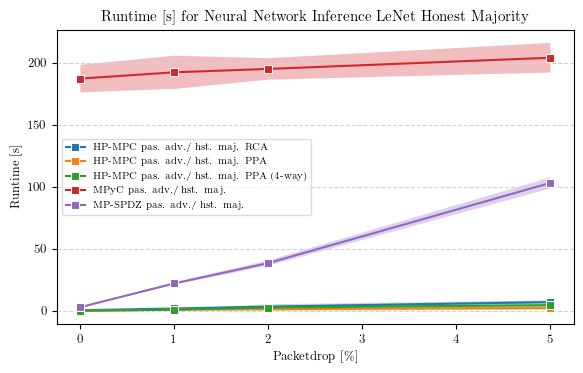

In [27]:
packetdrop_honest = [x for i, x in enumerate(packetdrop) if "dishst." not in label[i]]
label_honest = [x for x in label if "dishst." not in x]
rf.plot_deviation(packetdrop_honest,label_honest,"Mult_Packetdrop_dev_honest.png",experiment+" Honest Majority","Packetdrop [\%]","Runtime [s]",False)

In [13]:
label[0]="HP-MPC \n pas. adv./ hst. maj. RCA"
label[1]="HP-MPC \n pas. adv./ hst. maj. PPA"
label[2]="HP-MPC \n pas. adv./ hst. maj. PPA (4-way)"
label[3]="MPyC \n pas. adv./ hst. maj."
label[4]="MP-SPDZ \n pas. adv./ hst. maj."

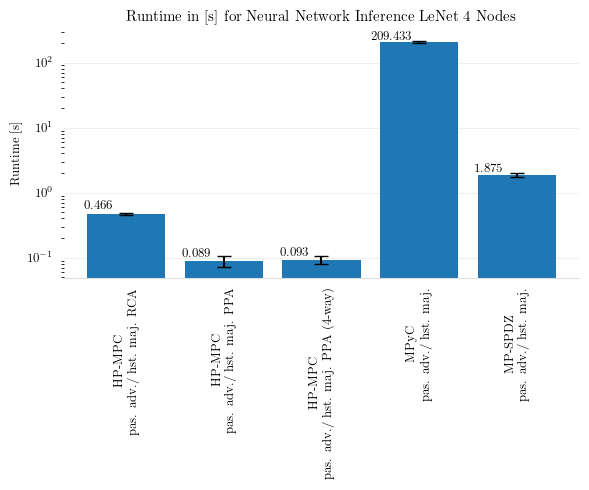

In [14]:
y_label="Runtime [s]"
titel="Runtime in [s] for Neural Network Inference LeNet 4 Nodes"
x_label="Protocols"
mean_values = [round(df['mean'].iloc[0],3) for df in latency]
std_values = [round(df['std'].iloc[0],3) for df in latency]
fig, ax = plt.subplots()
ax.set_yscale('log')  # Set y-axis as logarithmic
bars=ax.bar(label, mean_values,yerr=std_values,capsize=5)
ax.set_ylabel(y_label)
ax.set_title(titel)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
fig.tight_layout()
# Rotate labels
# Add values on top of bars
for i,bar in enumerate(bars):
    if i in [1,2]:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2 - 0.28, yval + 0.005, yval, ha='center', va='bottom',weight='bold')
    else:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2 - 0.28, yval + 0.05, yval, ha='center', va='bottom',weight='bold')
ax.figure.set_size_inches(5.9, 3)
plt.xticks(rotation='vertical')
plt.savefig(experiment+'_bar.png',dpi=300, bbox_inches='tight')
plt.show()

In [31]:
latency1,label1 = rf.get_latency_deviation(data)
latency2,label2 = rf.get_latency_deviation(data2)
mean_values1 = [round(df['mean'].iloc[0],3) for df in latency1]
std_values1 = [round(df['std'].iloc[0],3) for df in latency1]
mean_values2 = [round(df['mean'].iloc[0],3) for df in latency2]
std_values2 = [round(df['std'].iloc[0],3) for df in latency2]

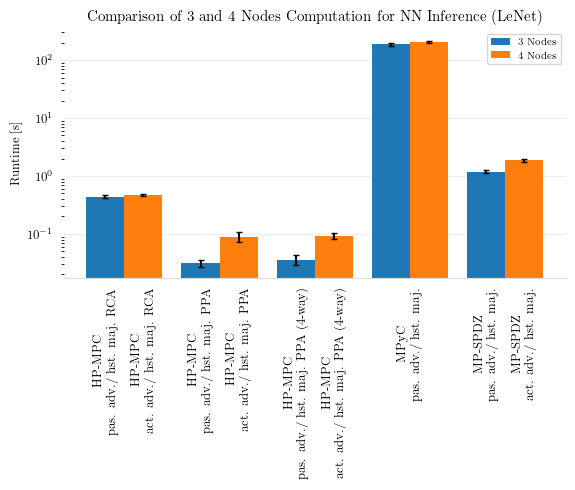

In [43]:
import numpy as np
y_label="Runtime [s]"
titel="Runtime in [s] for Neural Network Inference LeNet 4 Nodes"
x_label="Protocols"
# Convert the lists to numpy arrays
mean_values1 = np.array(mean_values1)
mean_values2 = np.array(mean_values2)
std_values1 = np.array(std_values1)
std_values2 = np.array(std_values2)
# Set the width of the bars
width = 0.4

# Create an array of indices for the x-axis
indices=np.arange(len(mean_values1))
ticks=[0,0.4,1,1.4,2,2.4,3.2,4,4.4]
labels=[
    "HP-MPC \n pas. adv./ hst. maj. RCA",
    "HP-MPC \n act. adv./ hst. maj. RCA",
    "HP-MPC \n pas. adv./ hst. maj. PPA",
    "HP-MPC \n act. adv./ hst. maj. PPA",
    "HP-MPC \n pas. adv./ hst. maj. PPA (4-way)",
    "HP-MPC \n act. adv./ hst. maj. PPA (4-way)",
    "MPyC \n pas. adv./ hst. maj.",
    "MP-SPDZ \n pas. adv./ hst. maj.",
    "MP-SPDZ \n act. adv./ hst. maj.",
]

# Create the figure and axis objects
fig, ax = plt.subplots()
# Plot the bars for mean_values2 next to mean_values1
ax.bar(indices, mean_values2,width,yerr=std_values2, label='3 Nodes')
# Plot the bars for mean_values1
ax.bar(indices+width, mean_values1, width,yerr=std_values1, label='4 Nodes')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
# Set the x-axis labels
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Set the y-axis label
ax.set_ylabel(y_label)
ax.set_yscale('log')  # Set y-axis as logarithmic
# Set the title
ax.set_title('Comparison of 3 and 4 Nodes Computation for NN Inference (LeNet)')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
# Add a legend
ax.legend()
fig.tight_layout()
# Show the plot

ax.figure.set_size_inches(5.9, 3)
plt.xticks(rotation='vertical')
plt.savefig(experiment+'_comparison_bar.png',dpi=300, bbox_inches='tight')
plt.show()

In [53]:
values1=[]
error1=[]
values2=[]
error2=[]
for i in range(len(data)):
    if data[i]['framework'][0] == "HPMPC":
        for function in data[i]['function'].unique():
            date = float(data[i].loc[(data[i]['function'] == function) & (data[i]['preprocess']==0), ['peakRAM(MiB)']].mean())
            err = float(data[i].loc[(data[i]['function'] == function) & (data[i]['preprocess']==0), ['peakRAM(MiB)']].std())
            values1.append(round(date,2))
            error1.append(round(err,2))
    elif data[i]['framework'][0] in ["MP-SPDZ"]:
        for protocol in data[i]['protocol'].unique():
            if protocol not in ["ps-rep-field","ps-rep-ring","ps-rep-bin","sy-rep-field","malicious-rep-field"]:
                date = float(data[i].loc[ (data[i]['protocol']==protocol), ['peakRAM(MiB)']].mean())
                err = float(data[i].loc[ (data[i]['protocol']==protocol), ['peakRAM(MiB)']].std())
                values1.append(round(date,2))
                error1.append(round(err,2))
    elif data2[i]['framework'][0] in ["MOTION"]:
        continue
    else:
        date = float(data[i]['peakRAM(MiB)'].mean())
        err = float(data[i]['peakRAM(MiB)'].std())
        values1.append(round(date,2))
        error1.append(round(err,2))

for i in range(len(data2)):
    if data2[i]['framework'][0] == "HPMPC":
        for function in data2[i]['function'].unique():
            date = float(data2[i].loc[(data2[i]['function'] == function) & (data2[i]['preprocess']==0), ['peakRAM(MiB)']].mean())
            err = float(data2[i].loc[(data2[i]['function'] == function) & (data2[i]['preprocess']==0), ['peakRAM(MiB)']].std())
            values2.append(round(date,2))
            error2.append(round(err,2))
    elif data2[i]['framework'][0] in ["MP-SPDZ"]:
        for protocol in data2[i]['protocol'].unique():
            if protocol not in ["ps-rep-field","ps-rep-ring","ps-rep-bin","sy-rep-field","malicious-rep-field"]:
                date = float(data2[i].loc[ (data2[i]['protocol']==protocol), ['peakRAM(MiB)']].mean())
                err = float(data2[i].loc[ (data2[i]['protocol']==protocol), ['peakRAM(MiB)']].std())
                values2.append(round(date,2))
                error2.append(round(err,2))
    elif data2[i]['framework'][0] in ["MOTION"]:
        continue
    else:
        date = float(data2[i]['peakRAM(MiB)'].mean())
        err = float(data2[i]['peakRAM(MiB)'].std())
        values2.append(round(date,2))
        error2.append(round(err,2))

C:\Users\q533604\AppData\Local\Temp\ipykernel_12036\3537150103.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  date = float(data2[i].loc[(data2[i]['function'] == function) & (data2[i]['preprocess']==0), ['peakRAM(MiB)']].mean())
C:\Users\q533604\AppData\Local\Temp\ipykernel_12036\3537150103.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  err = float(data2[i].loc[(data2[i]['function'] == function) & (data2[i]['preprocess']==0), ['peakRAM(MiB)']].std())
C:\Users\q533604\AppData\Local\Temp\ipykernel_12036\3537150103.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  date = float(data2[i].loc[(data2[i]['function'] == function) & (data2[i]['preprocess']==0), ['peakRAM(MiB)']].mean())
C:\Use

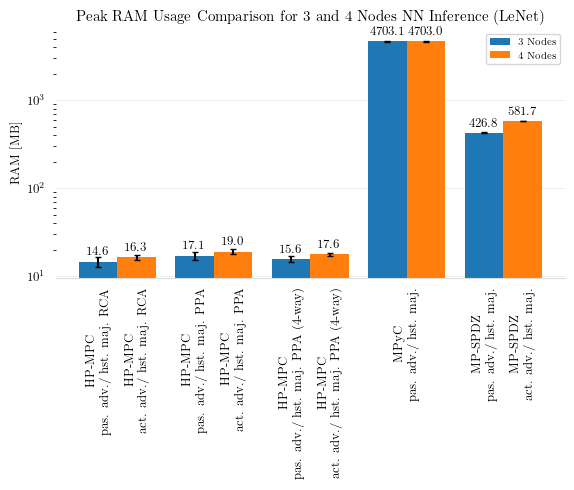

In [60]:
y_label="RAM [MB]"
titel="Peak RAM Usage Comparison for 3 and 4 Nodes NN Inference (LeNet)"
x_label="Protocols"
# Convert the lists to numpy arrays
mean_values1 = np.array(values1)
mean_values2 = np.array(values2)
std_values1 = np.array(error1)
std_values2 = np.array(error2)
# Set the width of the bars
width = 0.4

# Create an array of indices for the x-axis
indices=np.arange(len(mean_values1))
ticks=[0,0.4,1,1.4,2,2.4,3.2,4,4.4]
labels=[
    "HP-MPC \n pas. adv./ hst. maj. RCA",
    "HP-MPC \n act. adv./ hst. maj. RCA",
    "HP-MPC \n pas. adv./ hst. maj. PPA",
    "HP-MPC \n act. adv./ hst. maj. PPA",
    "HP-MPC \n pas. adv./ hst. maj. PPA (4-way)",
    "HP-MPC \n act. adv./ hst. maj. PPA (4-way)",
    "MPyC \n pas. adv./ hst. maj.",
    "MP-SPDZ \n pas. adv./ hst. maj.",
    "MP-SPDZ \n act. adv./ hst. maj.",
]

# Create the figure and axis objects
fig, ax = plt.subplots()
# Plot the bars for mean_values2 next to mean_values1
bar1=ax.bar(indices, mean_values2,width,yerr=std_values2, label='3 Nodes')
# Plot the bars for mean_values1
bar2=ax.bar(indices+width, mean_values1, width,yerr=std_values1, label='4 Nodes')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
# Set the x-axis labels
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Set the y-axis label
ax.set_ylabel(y_label)
ax.set_yscale('log')  # Set y-axis as logarithmic
# Set the title
ax.set_title(titel)

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
for rect in bar1:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

for rect in bar2:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Add a legend
ax.legend()
fig.tight_layout()
# Show the plot

ax.figure.set_size_inches(5.9, 3)
plt.xticks(rotation='vertical')
plt.savefig(experiment+'_comparison_bar.png',dpi=300, bbox_inches='tight')
plt.show()